In [1]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz

import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb


C:\Users\fabio\AppData\Local\conda\conda\envs\tera-fev2018\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\fabio\AppData\Local\conda\conda\envs\tera-fev2018\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
rd = pd.read_csv("rd_500k.csv")

C:\Users\fabio\AppData\Local\conda\conda\envs\tera-fev2018\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (41,42,43,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#rdc = rd[rd["DIAS_PERM"] >= 8]

In [10]:
rd\
.groupby(by=["DIAG_PRINC"]) \
.aggregate({"DIAS_PERM" : ['count','min','mean','max','median','std','var'], "UTI_MES_TO" : ['count','min','mean','max','median','std','var']}) \
.sort_values(('DIAS_PERM', 'count'), ascending = False) \
.head(20)

DIAS_PERM                                                    \
               count min       mean  max median        std         var   
DIAG_PRINC                                                               
O800           29374   0   1.828249   92    2.0   1.339344    1.793842   
J189           13475   0   6.367495  156    4.0   7.092657   50.305786   
N390           10046   0   4.708839  114    3.0   4.998590   24.985899   
A90             8587   0   3.180622   38    3.0   2.435108    5.929753   
O829            8392   0   2.288370   93    2.0   1.497630    2.242897   
I64             7748   0   7.092669  113    5.0   7.864818   61.855359   
O809            6925   0   1.839278   44    2.0   1.224516    1.499439   
I500            6468   0   7.506030  122    5.0   8.279716   68.553698   
I509            5763   0   6.448031   87    4.0   6.645159   44.158137   
I200            5258   0   6.012172  358    4.0   7.800333   60.845201   
A419            4983   0  13.195063  167    8.0  14.378217  206.733119   
O821            4888   0   2.420622   33    2.0   1.233958    1.522652   
A09             4771   0   3.320059   68    3.0   2.951540    8.711587   
J159            4418   0   7.281123  105    5.0   7.669463   58.820658   
I839            4113   0   0.899587   32    1.0   1.074049    1.153582   
I219            3875   0   6.851355   81    5.0   6.648572   44.203506   
K359            3756   0   3.307242   48    2.0   2.974613    8.848320   
K409            3742   0   1.433725   75    1.0   1.980192    3.921161   
O828            3714   0   2.321217   16    2.0   1.109393    1.230754   
Z302            3598   0   1.370484   31    1.0   1.415701    2.004211   

           UTI_MES_TO                                                 
                count min      mean  max median       std        var  
DIAG_PRINC                                                            
O800            29374   0  0.001532    5    0.0  0.071206   0.005070  
J189            13475   0  0.726827  153    0.0  3.693519  13.642085  
N390            10046   0  0.079236   59    0.0  1.142375   1.305020  
A90              8587   0  0.064749   27    0.0  0.793786   0.630095  
O829             8392   0  0.006435   14    0.0  0.190857   0.036426  
I64              7748   0  1.182757  102    0.0  4.345288  18.881530  
O809             6925   0  0.001588    2    0.0  0.052360   0.002742  
I500             6468   0  0.994589   99    0.0  4.083571  16.675554  
I509             5763   0  0.803575   60    0.0  3.213227  10.324826  
I200             5258   0  1.439140   45    0.0  2.923963   8.549558  
A419             4983   0  4.953843   92    0.0  8.988790  80.798351  
O821             4888   0  0.006137    5    0.0  0.137069   0.018788  
A09              4771   0  0.026410   11    0.0  0.370470   0.137248  
J159             4418   0  0.801494   37    0.0  3.432750  11.783770  
I839             4113   0  0.005835   11    0.0  0.194689   0.037904  
I219             3875   0  2.520000   79    1.0  4.045087  16.362726  
K359             3756   0  0.085463   38    0.0  0.983427   0.967128  
K409             3742   0  0.032603   57    0.0  0.971118   0.943069  
O828             3714   0  0.004847    4    0.0  0.108751   0.011827  
Z302             3598   0  0.006948    9    0.0  0.177107   0.031367

In [11]:
x = rd.loc[:,["DIAG_PRINC","SEXO","IND_VDRL","IDADE","CAR_INT","NUM_FILHOS","PROC_SOLIC",
                    "INSTRU","CNAER","RACA_COR","ETNIA","DIAGSEC1","DIAGSEC2","DIAGSEC3","DIAGSEC4","DIAGSEC5","DIAGSEC6","DIAGSEC7"]]
y = rd["DIAS_PERM"]

In [12]:
x["DIAGSEC1"] = x["DIAGSEC1"].fillna(0)
x["DIAGSEC2"] = x["DIAGSEC2"].fillna(0)
x["DIAGSEC3"] = x["DIAGSEC3"].fillna(0)
x["DIAGSEC4"] = x["DIAGSEC4"].fillna(0)
x["DIAGSEC5"] = x["DIAGSEC5"].fillna(0)
x["DIAGSEC6"] = x["DIAGSEC6"].fillna(0)

In [13]:
x["DIAGSEC1"] = x["DIAGSEC1"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC2"] = x["DIAGSEC2"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC3"] = x["DIAGSEC3"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC4"] = x["DIAGSEC4"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC5"] = x["DIAGSEC5"].apply(lambda x : x if x == 0 else 1)
x["DIAGSEC6"] = x["DIAGSEC6"].apply(lambda x : x if x == 0 else 1)
x["DIAG_GRUPO"] = x["DIAG_PRINC"].apply( lambda x :  x[0])
x["PROC_SOLIC"] = x["PROC_SOLIC"].apply( lambda x :  str(x)[:2])

In [14]:
x["DIAGSEC"] =  x["DIAGSEC1"] + x["DIAGSEC2"] + x["DIAGSEC3"] + x["DIAGSEC4"] + x["DIAGSEC5"] + x["DIAGSEC6"]

In [15]:
x = x.drop(["DIAGSEC1","DIAGSEC2","DIAGSEC3","DIAGSEC4","DIAGSEC5","DIAGSEC6","DIAGSEC7","DIAG_PRINC"],axis='columns')

In [16]:
categorical_mask=["SEXO","IND_VDRL","CAR_INT","DIAG_GRUPO","PROC_SOLIC",\
                    "INSTRU","CNAER","RACA_COR","ETNIA","DIAGSEC"]
#ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)
#i200x = ohe.fit_transform(i200x)
x = pd.get_dummies(x,columns=categorical_mask)

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=42)
dt = DecisionTreeRegressor(criterion='mse',max_depth=5)
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

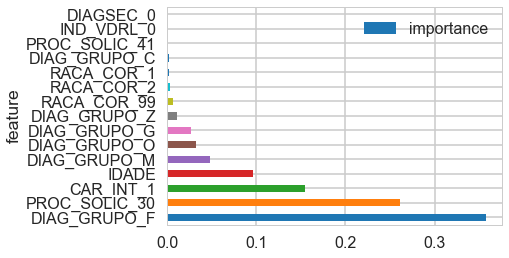

In [18]:
imps = pd.DataFrame({'importance': dt.feature_importances_, 'feature': x.columns}).sort_values('importance', ascending = False)[:15]
imps.plot(x='feature', y='importance', kind='barh')
plt.figure(figsize=(20,10))
plt.show()

In [19]:
pred = dt.predict(xtest)
metrics.mean_squared_error(pred,ytest)

45.62748407149829

In [20]:
rf = RandomForestRegressor(n_estimators=100, max_features=7, max_depth=20, min_samples_split=500)
rf.fit(xtrain, ytrain)
predrf = rf.predict(xtest)
print( "MSE:  ", metrics.mean_squared_error(predrf,ytest))
print( "MAE:  ", metrics.mean_absolute_error(predrf,ytest))
print( "R2:  ", metrics.r2_score(predrf,ytest))

MSE:   43.37721577485116
MAE:   3.6224587757145925
R2:   -3.6404866487208354


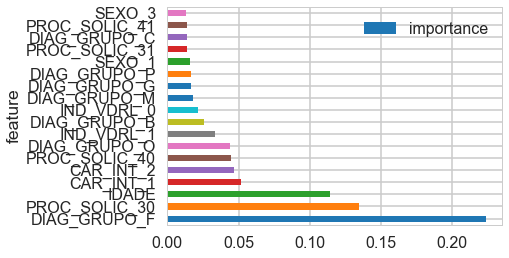

In [23]:
imps = pd.DataFrame({'importance': rf.feature_importances_, 'feature': x.columns}).sort_values('importance', ascending = False)[:18]
imps.plot(x='feature', y='importance', kind='barh')
plt.figure(figsize=(40,20))
plt.show()

In [24]:
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'n_estimators': [25],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor(n_estimators=10)

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(param_distributions=gbm_param_grid, estimator=gbm, scoring="neg_mean_squared_error", n_iter=5, cv=4, verbose=1)


# Fit randomized_mse to the data
randomized_mse.fit(xtrain,ytrain)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.4min finished


Best parameters found:  {'n_estimators': 25, 'max_depth': 11}
Lowest RMSE found:  6.523788464588508


In [25]:
gbm = xgb.XGBRegressor(n_estimators=25, max_depth=4)
gbm.fit(xtrain,ytrain)
predxgb = gbm.predict(xtest)
print( "MSE:  ", metrics.mean_squared_error(predxgb,ytest))
print( "MAE:  ", metrics.mean_absolute_error(predxgb,ytest))
print( "R2:  ", metrics.r2_score(predxgb,ytest))

MSE:   45.04807693811254
MAE:   3.5842124454808237
R2:   -4.825216456481279


In [26]:
gbm.score(xtest,ytest)

0.20339246191072047

In [27]:
xgb.plot_tree(gbm, num_trees=2)
fig = plt.gcf()
fig.set_size_inches(200, 100)


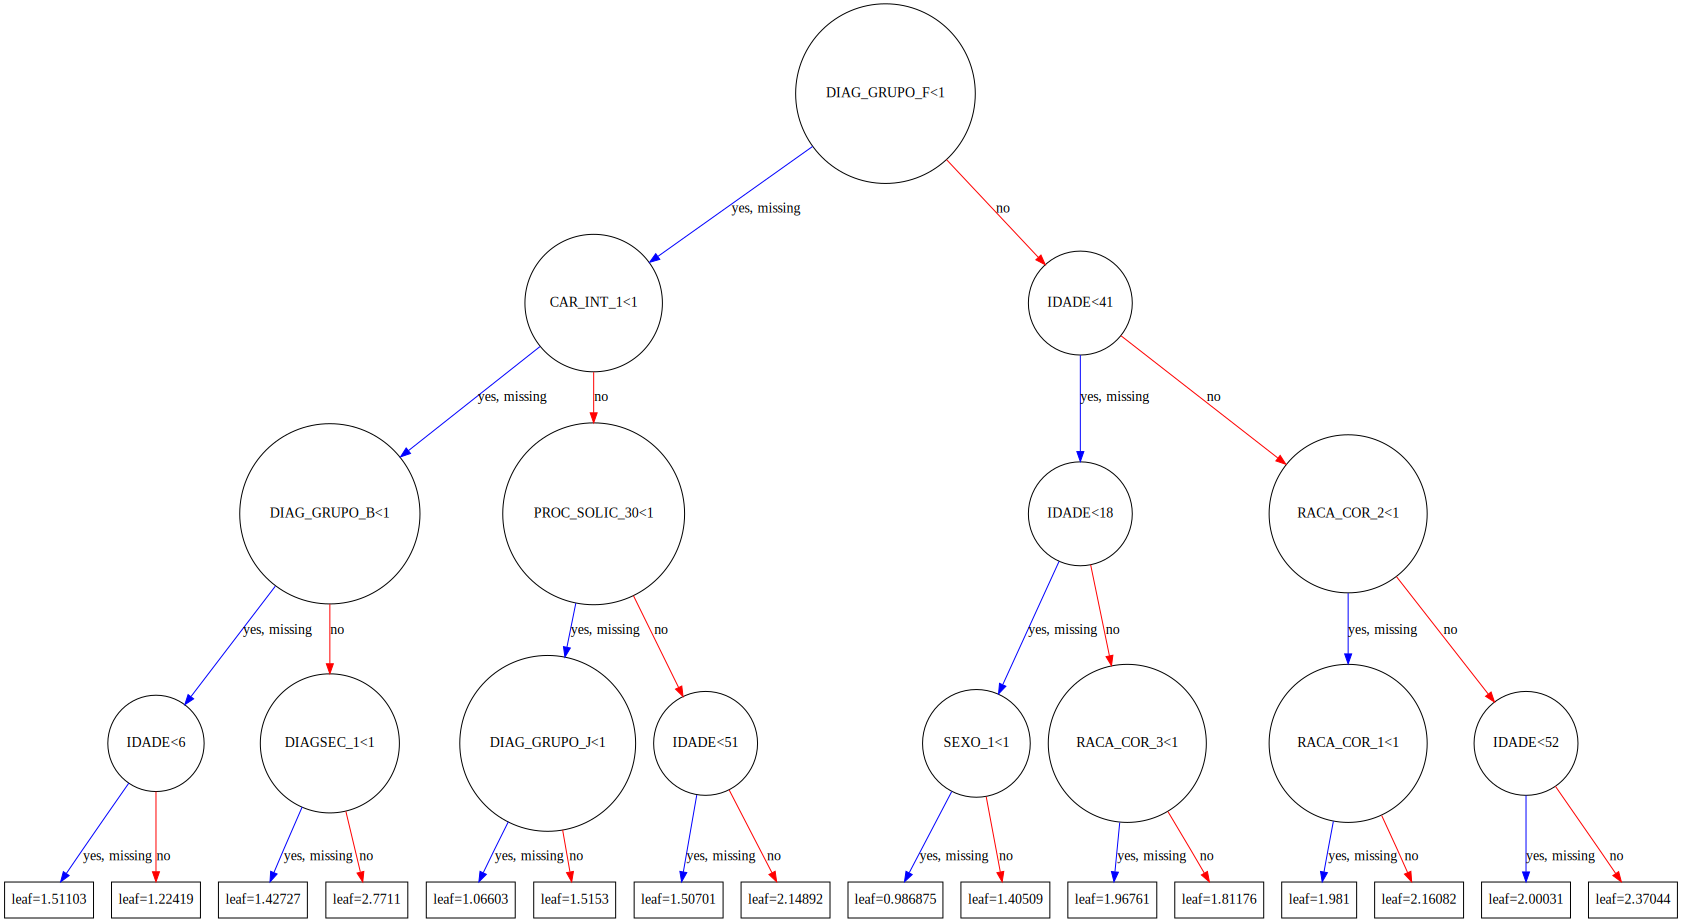

In [22]:
xgb.to_graphviz(gbm, num_trees=2)

In [23]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(x)
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

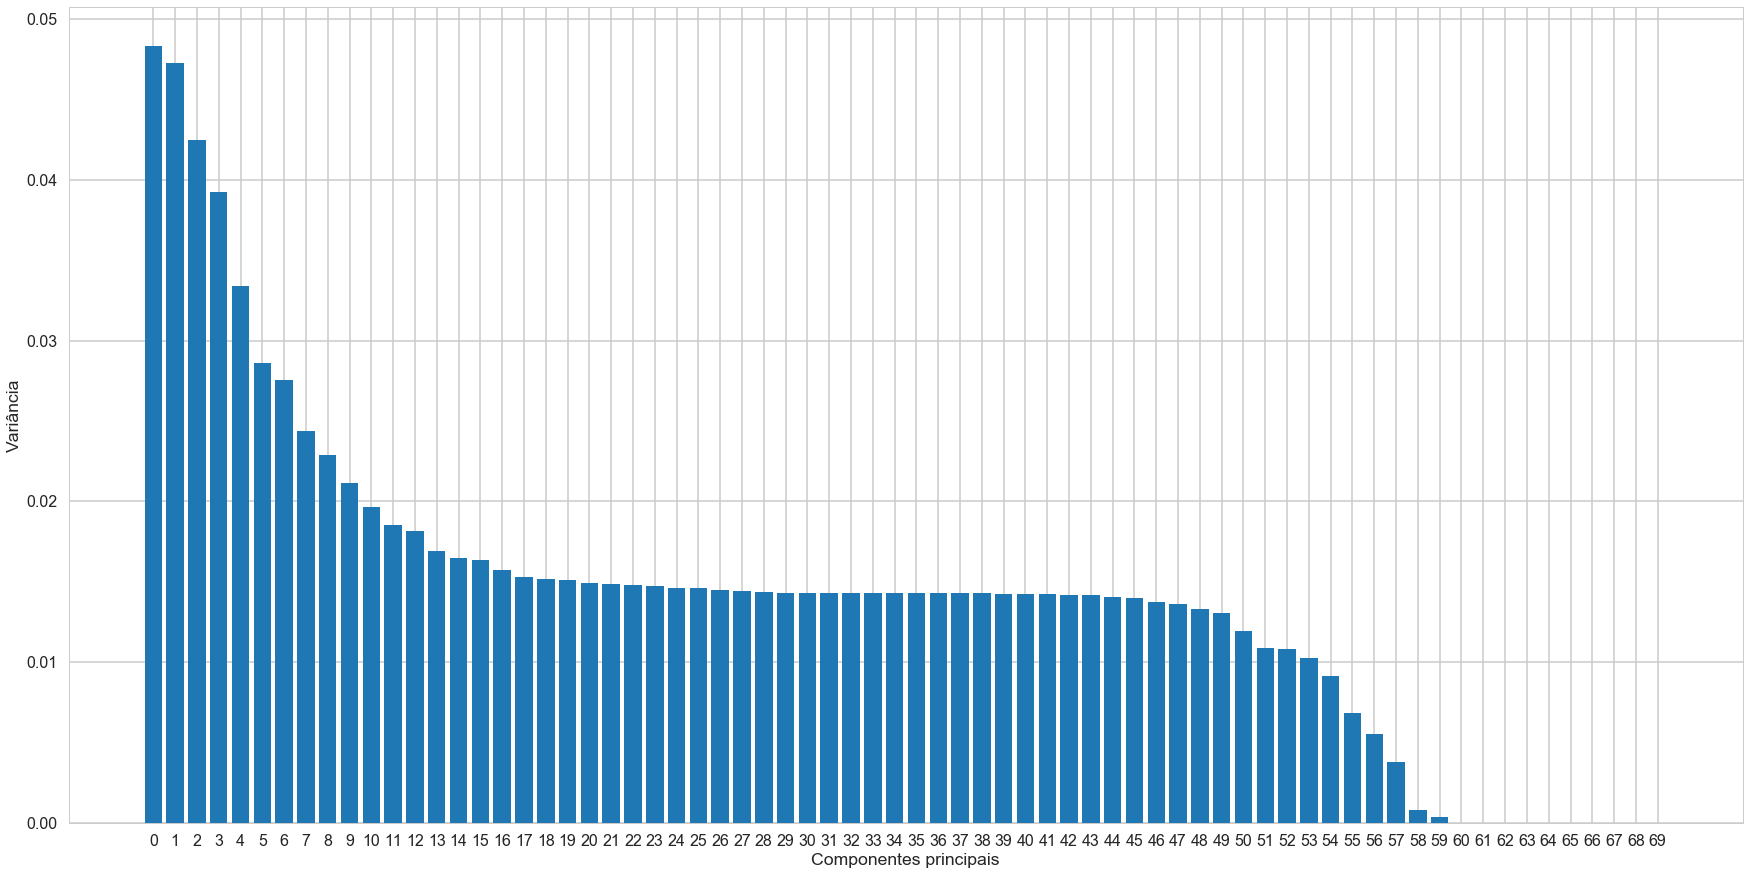

Variância explicada: 
--------------------------------------------------
1 Componente(s) principal(is): 4.83%
2 Componente(s) principal(is): 9.56%
3 Componente(s) principal(is): 13.81%
4 Componente(s) principal(is): 17.74%
5 Componente(s) principal(is): 21.08%
6 Componente(s) principal(is): 23.94%
7 Componente(s) principal(is): 26.69%
8 Componente(s) principal(is): 29.13%
9 Componente(s) principal(is): 31.42%
10 Componente(s) principal(is): 33.53%
11 Componente(s) principal(is): 35.49%
12 Componente(s) principal(is): 37.34%
13 Componente(s) principal(is): 39.16%
14 Componente(s) principal(is): 40.85%
15 Componente(s) principal(is): 42.50%
16 Componente(s) principal(is): 44.13%
17 Componente(s) principal(is): 45.70%
18 Componente(s) principal(is): 47.23%
19 Componente(s) principal(is): 48.75%
20 Componente(s) principal(is): 50.26%
21 Componente(s) principal(is): 51.75%
22 Componente(s) principal(is): 53.23%
23 Componente(s) principal(is): 54.71%
24 Componente(s) principal(is): 56.19%
25

In [24]:
plt.figure(figsize=(30,15))
features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.xlabel('Componentes principais')
plt.ylabel('Variância')
plt.show()

print('Variância explicada: ')
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)

print('-'*50)
for i in range(len(pca.explained_variance_ratio_)):
    print('{} Componente(s) principal(is): {:.2%}'.format(i+1, cum_exp_var[i]))